<a href="https://colab.research.google.com/github/gaytri9/Sentiment-Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import os
import json
import random
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import json

# Assuming you have Yelp review data in a JSON format
yelp_data_file = '/content/yelp_academic_dataset_tip.json'

In [ ]:
import json

def fix_json_file(filename):
    with open(filename, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    # Open the file in write mode to overwrite the contents with the fixed data
    with open(filename, 'w', encoding='utf-8') as file:
        line_number = 0
        for line in lines:
            line_number += 1
            try:
                # Attempt to parse the line as JSON
                json.loads(line)
            except json.JSONDecodeError as e:
                # If an error occurs, attempt to fix the unterminated string
                print(f"Attempting to fix line {line_number}...")
                if line.strip().endswith('"'):
                    # If the line already ends with a double quote, skip it
                    continue
                # Append a double quote to the end of the line
                fixed_line = line.strip() + '"\n'
                # Write the fixed line to the file
                file.write(fixed_line)
                print(f"Fixed line {line_number}.")
            else:
                # If no error occurs, write the original line to the file
                file.write(line)


# Replace 'your_filename.json' with the path to your JSON file
fix_json_file('/content/yelp_academic_dataset_tip.json')

Attempting to fix line 594044...
Fixed line 594044.


In [ ]:
import json

def fix_json_file(filename):
    with open(filename, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    for line_number, line in enumerate(lines, start=1):
        if line.strip() and not line.strip().endswith('}'):
            # Append a placeholder value to complete the JSON object
            fixed_line = line.strip()[:-1] + '":null}'
            lines[line_number - 1] = fixed_line

    # Write the fixed lines back to the file
    with open(filename, 'w', encoding='utf-8') as file:
        file.writelines(lines)

# Replace 'your_filename.json' with the path to your JSON file
fix_json_file('/content/yelp_academic_dataset_tip.json')

In [ ]:
import json
import random
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Initialize an empty list to store parsed JSON objects
yelp_data = []

# File path to the Yelp data file
yelp_data_file = "/content/yelp_academic_dataset_tip.json"  # Replace "your_yelp_data_file.json" with the actual file path

# Open the JSON file and read it line by line
with open(yelp_data_file, 'r', encoding='utf-8') as file:
    for line in file:
        # Parse each line as JSON and append it to the list
        try:
            yelp_data.append(json.loads(line))
        except json.JSONDecodeError as e:
            print("JSONDecodeError:", e)
            print("Skipping this line.")

# Now, yelp_data contains a list of dictionaries, each representing a JSON object from the file
# You can iterate over this list to access individual reviews

# Sample 20 reviews
random_reviews = random.sample(yelp_data, 40)

# Counter for simplified review names
review_counter = 1

# Tokenize and process text
def process_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Remove non-alphabetic tokens
    alphabetic_tokens = [word for word in filtered_tokens if word.isalpha()]
    return alphabetic_tokens

# Iterate over sampled reviews
for review in random_reviews:
    # Simplify review name
    simplified_review_name = f"review{review_counter}.json"

    # Process review text
    processed_text = process_text(review['text'])

    # Associate review with its processed text
    review_data = {'review_file_path': simplified_review_name, 'processed_text': processed_text}

    # Now you can use or store the review data as needed
    print(review_data)

    # Increment review counter
    review_counter += 1


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


JSONDecodeError: Expecting ',' delimiter: line 1 column 145 (char 144)
Skipping this line.
JSONDecodeError: Unterminated string starting at: line 1 column 12 (char 11)
Skipping this line.
{'review_file_path': 'review1.json', 'processed_text': ['saturday', 'sunday', 'crowded', 'order', 'grouper', 'sandwich']}
{'review_file_path': 'review2.json', 'processed_text': ['impressed', 'great', 'chicken', 'good', 'prices']}
{'review_file_path': 'review3.json', 'processed_text': ['clean', 'rooms', 'free', 'internet', 'sweeeet']}
{'review_file_path': 'review4.json', 'processed_text': ['favorite', 'thai', 'place', 'dine', 'takeaway', 'everything', 'good', 'fast']}
{'review_file_path': 'review5.json', 'processed_text': ['drafts', 'nuff', 'said']}
{'review_file_path': 'review6.json', 'processed_text': ['eat', 'restaurant', 'called', 'pomodoro', 'please', 'avoid', 'lamb', 'dish', 'cooked', 'correctly']}
{'review_file_path': 'review7.json', 'processed_text': ['awesome', 'service', 'needed', 'help', 'qu

In [ ]:
import json
import random
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Initialize Porter stemmer
porter = PorterStemmer()

# Sample 20 reviews
random_reviews = random.sample(yelp_data, 40)

# Define a function for preprocessing each review text
def preprocess_review(review_text):
    # Tokenization
    tokens = word_tokenize(review_text)

    # Lowercasing
    tokens = [token.lower() for token in tokens]

    # Removing punctuation
    tokens = [re.sub(r'[^\w\s]', '', token) for token in tokens]

    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Stemming
    tokens = [porter.stem(token) for token in tokens]

    return ' '.join(tokens)

# Iterate over sampled reviews
for review in random_reviews:
    # Get review text
    review_text = review['text']

    # Preprocess review text
    preprocessed_review = preprocess_review(review_text)

    # Print preprocessed review
    # Print preprocessed review
    print(f"Review Text: {review['text']}")
    print(f"Preprocessed Text: {preprocessed_review}")
    print(f"Preprocessed Text: {preprocessed_review}")

Review Text: Pre-game tip: Definitely need to have a full meal before you come in... Don't go on an empty stomach!
Preprocessed Text: pregam tip  definit need full meal come  nt go empti stomach 
Preprocessed Text: pregam tip  definit need full meal come  nt go empti stomach 
Review Text: Closed Sundays
Preprocessed Text: close sunday
Preprocessed Text: close sunday
Review Text: Love this place!
Preprocessed Text: love place 
Preprocessed Text: love place 
Review Text: The best pizza leaving now
Preprocessed Text: best pizza leav
Preprocessed Text: best pizza leav
Review Text: Not sure why this place is getting slammed ... This isn't a gourmet Mexican place feel me .... It's like a Nico's ...
Preprocessed Text: sure place get slam  nt gourmet mexican place feel  like nico 
Preprocessed Text: sure place get slam  nt gourmet mexican place feel  like nico 
Review Text: Opening Friday, November 17th.
Preprocessed Text: open friday  novemb 17th 
Preprocessed Text: open friday  novemb 17th 


In [ ]:
# Create an empty list to store processed reviews
processed_reviews = []
import pickle
# Iterate over sampled reviews
for review in random_reviews:
    # Get review text
    review_text = review['text']

    # Preprocess review text
    preprocessed_review = preprocess_review(review_text)

    # Add preprocessed review to the list
    processed_reviews.append(preprocessed_review)

# Save the processed reviews to a file named 'all_reviews.pkl'
with open('all_reviews.pkl', 'wb') as f:
    pickle.dump(processed_reviews, f)

print("Processed reviews have been saved to all_reviews.pkl.")


Processed reviews have been saved to all_reviews.pkl.


In [ ]:
import pandas as pd
import pickle

# Load the processed data from corpus.pkl
with open('all_reviews.pkl', 'rb') as f:
    processed_data = pickle.load(f)

# Create a DataFrame from the loaded data
df = pd.DataFrame(processed_data, columns=['preprocessed_text'])

# Add a new column named 'review_id'
df['review_id'] = range(1, len(df) + 1)

# Save the DataFrame to a new corpus_with_id.pkl file
with open('corpus_with_id.pkl', 'wb') as f:
    pickle.dump(df, f)

print("corpus_with_id.pkl file has been created successfully.")



corpus_with_id.pkl file has been created successfully.


# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [ ]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('all_reviews.pkl')
data

['pregam tip  definit need full meal come  nt go empti stomach ',
 'close sunday',
 'love place ',
 'best pizza leav',
 'sure place get slam  nt gourmet mexican place feel  like nico ',
 'open friday  novemb 17th ',
 'bit dark  decent food   grit  grunt  bloodi mari brunch pleasantli surpris  updat   10 bottomless mimosa brunch',
 'hidden gem sushi good morrisvil ',
 'chanc nt like music  ask chang  super cool staff ',
 'great place cuban lunch  definit eat',
 'great humbl atmospher',
 'never baja cafe  let server know  give complimentari snickerdoodl pancak tri  pretti much like dessert breakfast  delici ',
 'bedbug  enough said ',
 'wood glue rope  anyth illeg ',
 'replical',
 'thank make outoftown feel welcom love pub style munchi  great support atmospher  fanci design  decor  wonder peopl  sweet wait staff  fun bar  ye  corn beef cabbag amaz  come back support good folk  thank guy ',
 'great local place  ',
 'playground back kiddo  go burn buzz ',
 'taco quesadilla delici ',
 'lanc

In [ ]:
import pickle
import pandas as pd

# Load the processed reviews from the pickle file
with open('all_reviews.pkl', 'rb') as f:
    processed_reviews = pickle.load(f)

# Create a DataFrame from the processed reviews
df = pd.DataFrame(processed_reviews, columns=['review_text'])

# Add an ID column starting from 1
df['review_id'] = range(0, len(df))

# Display the DataFrame
print(df)


                                          review_text  review_id
0   pregam tip  definit need full meal come  nt go...          0
1                                        close sunday          1
2                                         love place           2
3                                     best pizza leav          3
4   sure place get slam  nt gourmet mexican place ...          4
5                           open friday  novemb 17th           5
6   bit dark  decent food   grit  grunt  bloodi ma...          6
7                    hidden gem sushi good morrisvil           7
8   chanc nt like music  ask chang  super cool staff           8
9                great place cuban lunch  definit eat          9
10                              great humbl atmospher         10
11  never baja cafe  let server know  give complim...         11
12                               bedbug  enough said          12
13                       wood glue rope  anyth illeg          13
14                       

In [ ]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df['polarity'] = df['review_text'].apply(pol)
df['subjectivity'] = df['review_text'].apply(sub)
df

,review_text,review_id,polarity,subjectivity
0,pregam tip definit need full meal come nt go...,0,0.350000,0.550000
1,close sunday,1,0.000000,0.000000
2,love place,2,0.500000,0.600000
3,best pizza leav,3,1.000000,0.300000
4,sure place get slam nt gourmet mexican place ...,4,0.250000,0.444444
5,open friday novemb 17th,5,0.000000,0.500000
6,bit dark decent food grit grunt bloodi ma...,6,0.008333,0.533333
7,hidden gem sushi good morrisvil,7,0.266667,0.466667
8,chanc nt like music ask chang super cool staff,8,0.341667,0.658333
9,great place cuban lunch definit eat,9,0.800000,0.750000


<Axes: xlabel='polarity', ylabel='subjectivity'>

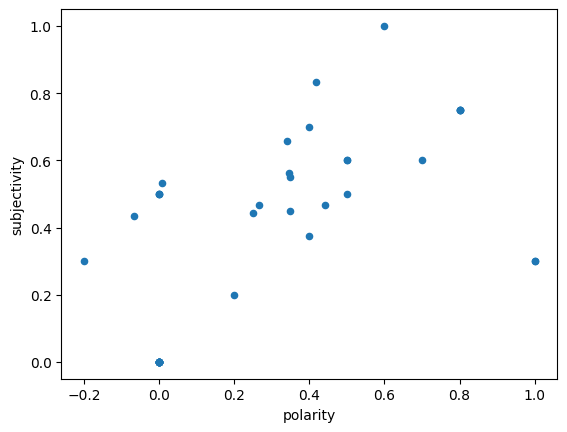

In [ ]:

df.plot(kind='scatter', x='polarity', y='subjectivity')

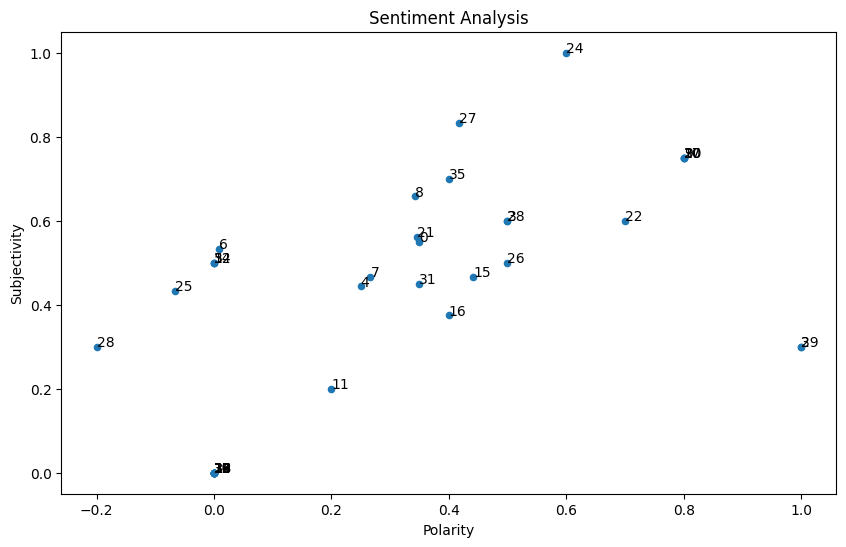

In [ ]:
import matplotlib.pyplot as plt

# Create the scatter plot
ax = df.plot(kind='scatter', x='polarity', y='subjectivity', figsize=(10, 6))

# Annotate each data point with the review ID
for i, txt in enumerate(df['review_id']):
    ax.annotate(txt, (df['polarity'][i], df['subjectivity'][i]))

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


In [ ]:
# Define classification criteria
def classify_polarity(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

def classify_subjectivity(subjectivity):
    if subjectivity > 0.5:
        return 'Subjective'
    else:
        return 'Objective'

# Apply classification to each text
classified_data = []
for text, polarity, subjectivity in zip(df['review_text'], df['polarity'], df['subjectivity']):
    polarity_class = classify_polarity(polarity)
    subjectivity_class = classify_subjectivity(subjectivity)
    classified_data.append({'Text': text, 'Polarity': polarity_class, 'Subjectivity': subjectivity_class})

# Display the classified data
for entry in classified_data:
    print(f"Text: {entry['Text']}, Polarity: {entry['Polarity']}, Subjectivity: {entry['Subjectivity']}")


Text: pregam tip  definit need full meal come  nt go empti stomach , Polarity: Positive, Subjectivity: Subjective
Text: close sunday, Polarity: Neutral, Subjectivity: Objective
Text: love place , Polarity: Positive, Subjectivity: Subjective
Text: best pizza leav, Polarity: Positive, Subjectivity: Objective
Text: sure place get slam  nt gourmet mexican place feel  like nico , Polarity: Positive, Subjectivity: Objective
Text: open friday  novemb 17th , Polarity: Neutral, Subjectivity: Objective
Text: bit dark  decent food   grit  grunt  bloodi mari brunch pleasantli surpris  updat   10 bottomless mimosa brunch, Polarity: Positive, Subjectivity: Subjective
Text: hidden gem sushi good morrisvil , Polarity: Positive, Subjectivity: Objective
Text: chanc nt like music  ask chang  super cool staff , Polarity: Positive, Subjectivity: Subjective
Text: great place cuban lunch  definit eat, Polarity: Positive, Subjectivity: Subjective
Text: great humbl atmospher, Polarity: Positive, Subjectivity: 

## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [ ]:
def split_text(text, n=10):
    '''Takes in a string of text and splits it into n equal parts.'''
    if n <= 0:
        return [text]  # If n is less than or equal to zero, return the entire text as a single part
    elif n >= len(text):
        return [text]  # If n is greater than or equal to the length of the text, return the entire text as a single part
    else:
        # Calculate length of text and the size of each chunk of text
        length = len(text)
        size = length // n  # Integer division to get the size of each chunk

        # Pull out equally sized pieces of text and put them into a list
        split_list = []
        for i in range(0, length, size):
            split_list.append(text[i:i+size])

        return split_list



In [ ]:
# Let's take a look at our data again
df

,review_text,review_id,polarity,subjectivity
0,pregam tip definit need full meal come nt go...,0,0.350000,0.550000
1,close sunday,1,0.000000,0.000000
2,love place,2,0.500000,0.600000
3,best pizza leav,3,1.000000,0.300000
4,sure place get slam nt gourmet mexican place ...,4,0.250000,0.444444
5,open friday novemb 17th,5,0.000000,0.500000
6,bit dark decent food grit grunt bloodi ma...,6,0.008333,0.533333
7,hidden gem sushi good morrisvil,7,0.266667,0.466667
8,chanc nt like music ask chang super cool staff,8,0.341667,0.658333
9,great place cuban lunch definit eat,9,0.800000,0.750000


In [ ]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in df.review_text:
    split = split_text(t)
    list_pieces.append(split)

#list_pieces

In [ ]:
# The list has 40 elements, one for each review_text
len(list_pieces)

40

In [ ]:
# Each transcript has been split into 12 pieces of text
len(list_pieces[0])

11

In [ ]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

polarity_transcript

[[0.0, 0.0, 0.0, 0.0, 0.35, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [-0.15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.2, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0],
 [0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.3, 0.0, 0.0, 0.7, 0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0

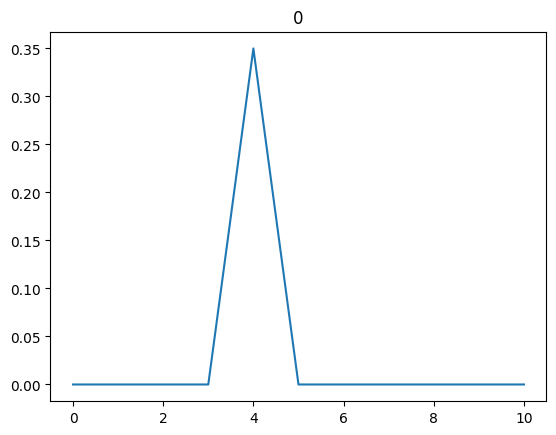

In [ ]:
# Show the plot for one review
plt.plot(polarity_transcript[0])
plt.title(df['review_id'].index[0])
plt.show()

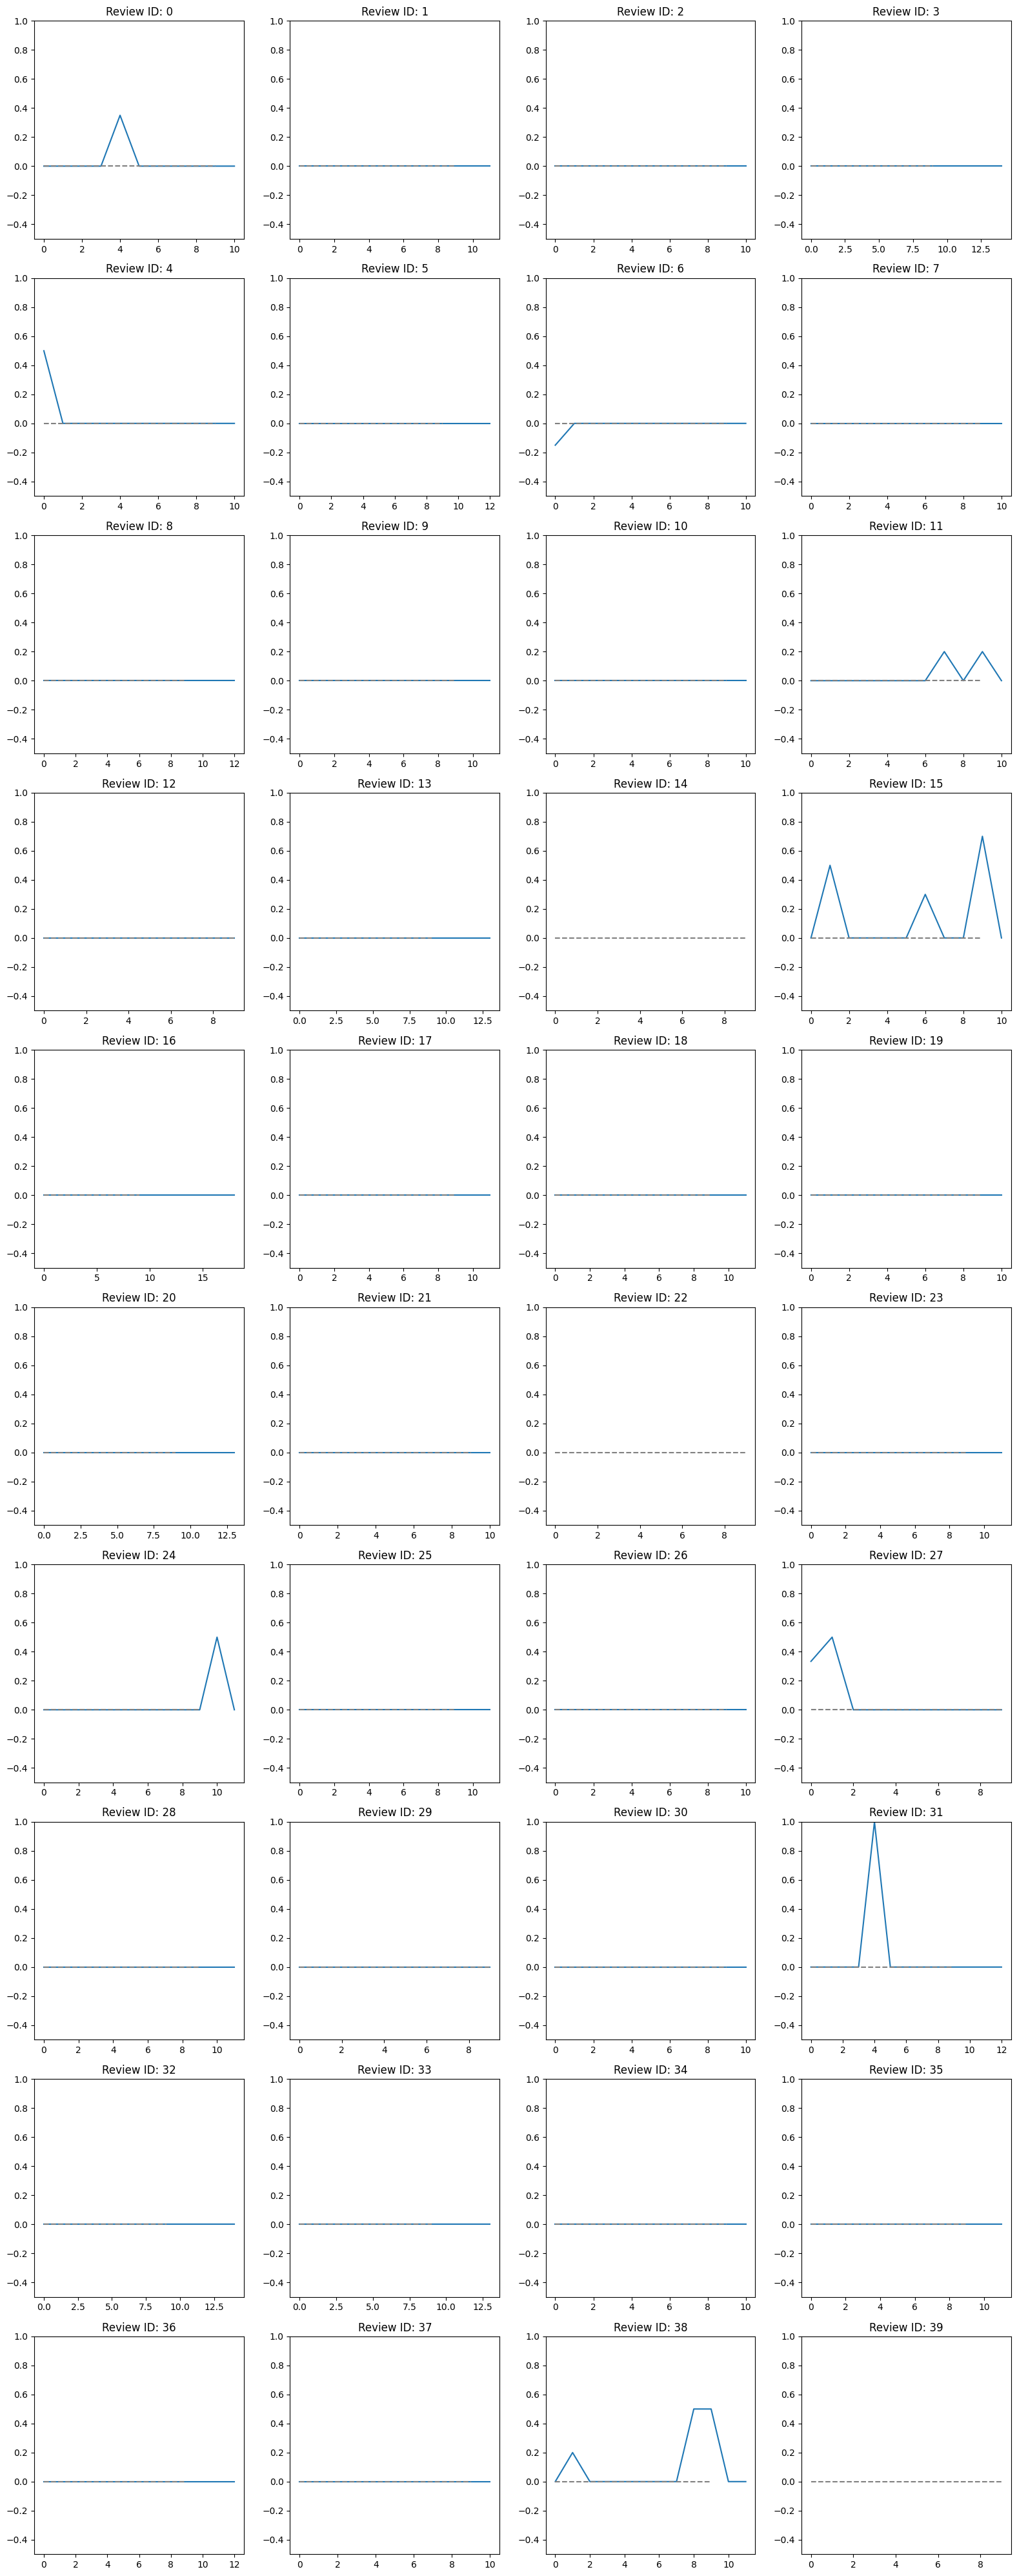

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate number of rows and columns needed for subplots
num_reviews = len(df)
num_rows = (num_reviews - 1) // 4 + 1
num_cols = min(num_reviews, 4)

# Set figure size
plt.rcParams['figure.figsize'] = [16, num_rows * 4]

# Plot polarity scores for all reviews
for index, review_id in enumerate(df['review_id']):
    plt.subplot(num_rows, num_cols, index + 1)  # Create subplot
    plt.plot(polarity_transcript[index])  # Plot polarity scores for the current review
    plt.plot(range(10), [0] * 10, linestyle='--', color='gray')  # Plot horizontal line at y=0
    plt.title(f"Review ID: {review_id}")  # Set title for the subplot
    plt.ylim(bottom=-0.5, top=1.0)  # Set y-axis limits

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()




In [ ]:
subjectivity_transcript = []
for lp in list_pieces:
    subjectivity_piece = []
    for p in lp:
        subjectivity_piece.append(TextBlob(p).sentiment.subjectivity)
    subjectivity_transcript.append(subjectivity_piece)

subjectivity_transcript

[[0.0, 0.0, 0.0, 0.0, 0.55, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.8888888888888888, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.6, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0],
 [0.0, 0.6, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.6000000000000001, 0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0

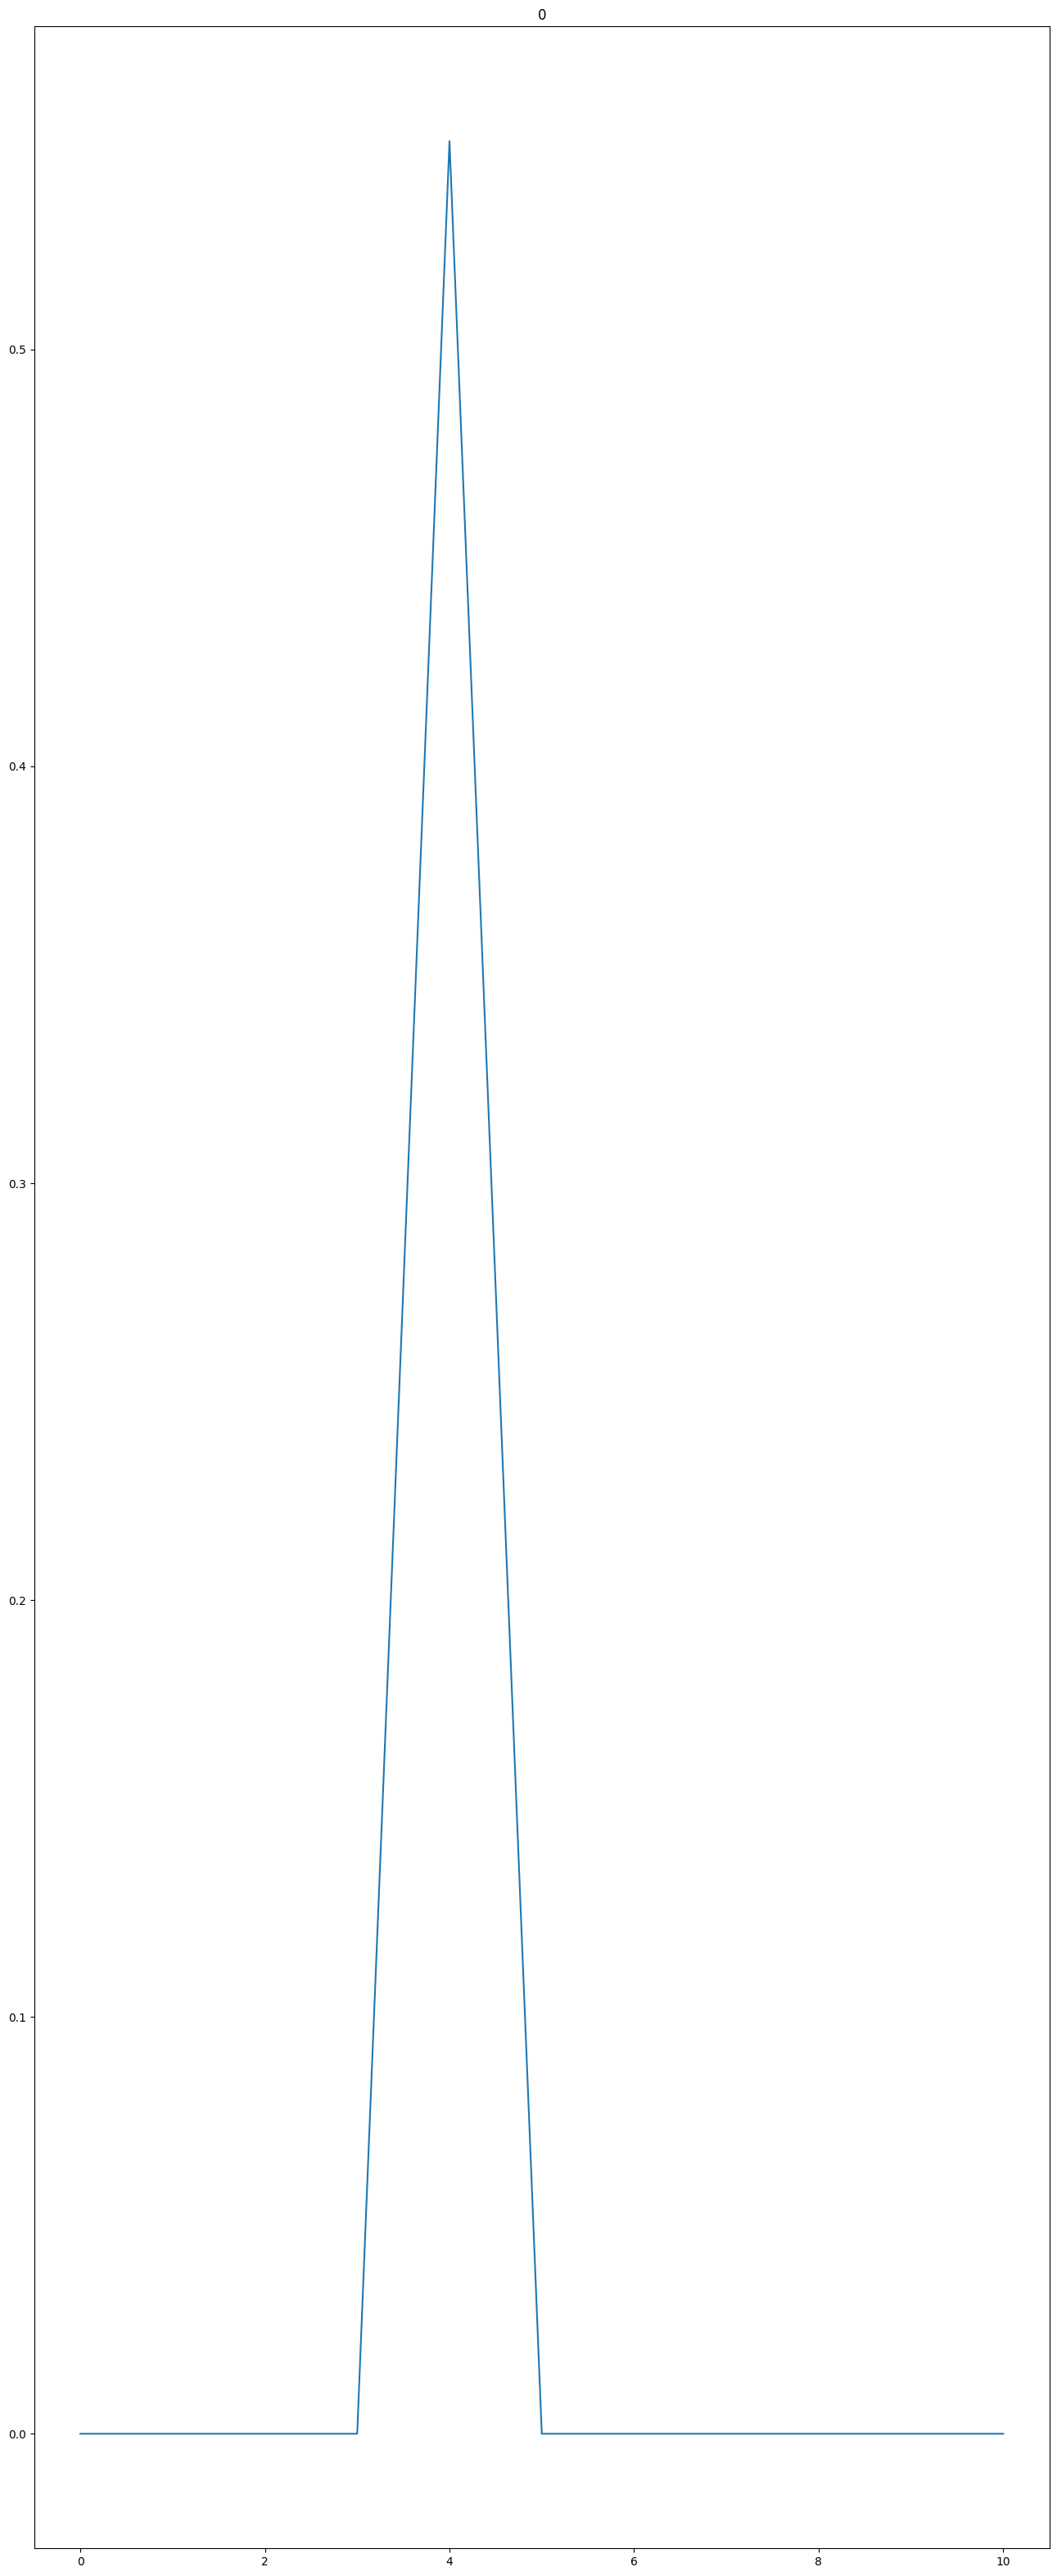

In [ ]:
plt.plot(subjectivity_transcript[0])
plt.title(df['review_id'].index[0])
plt.show()

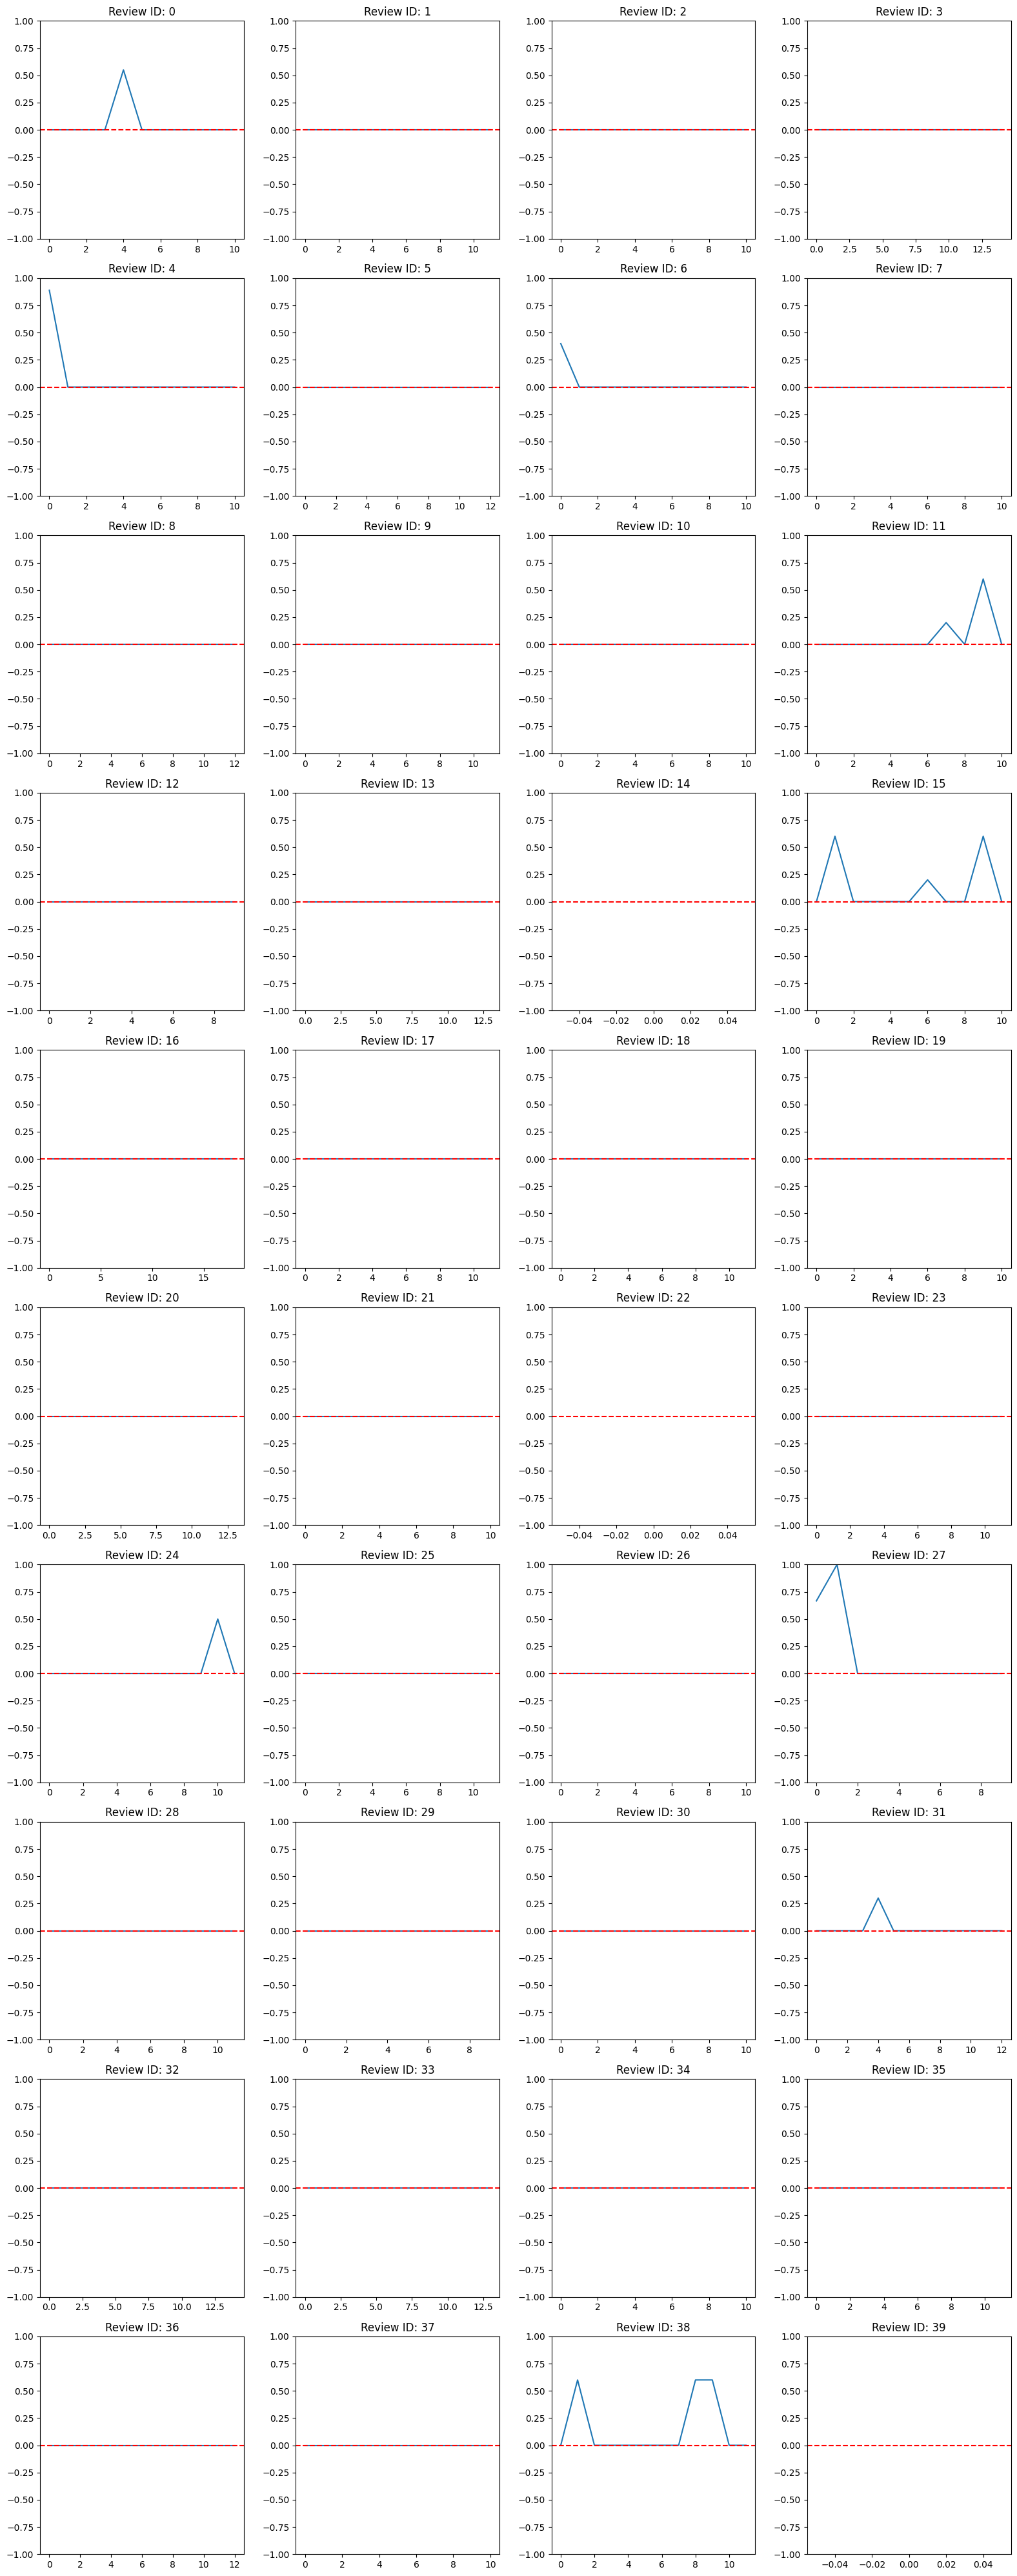

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate number of rows and columns needed for subplots
num_reviews = len(df)
num_rows = (num_reviews - 1) // 4 + 1
num_cols = min(num_reviews, 4)

# Set figure size
plt.rcParams['figure.figsize'] = [16, num_rows * 4]

# Plot subjectivity scores for all reviews
for index, review_id in enumerate(df['review_id']):
    plt.subplot(num_rows, num_cols, index + 1)  # Create subplot
    plt.plot(subjectivity_transcript[index])  # Plot subjectivity scores for the current review
    plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal dashed line at y=0
    plt.title(f"Review ID: {review_id}")  # Set title for the subplot
    plt.ylim(bottom=-1, top=1)  # Set y-axis limits to -1 to 1

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


### Assignments:
1. Classify all comedian accordig to Polarity and Subjectivity.
2. Modify the number of sections the comedy routine is split into and see how the charts over time change and again classify all comedian accordig to Polarity and Subjectivity.


### Assignment Solution
1. Classify all comedian accordig to Polarity and Subjectivity.

In [ ]:
def calpolsub(polarity_transcript,subjectivity_transcript):
    subavg=[]
    polavg=[]
    for i,yelp in enumerate(df.index):
        subavg1=sum(subjectivity_transcript[i])/len(subjectivity_transcript[i])
        polavg1=sum(polarity_transcript[i])/len(polarity_transcript[i])
        subavg.append(subavg1)
        polavg.append(polavg1)
    return subavg,polavg

subavg,polavg=calpolsub(polarity_transcript,subjectivity_transcript)

In [ ]:
def calpolsub(polarity_transcript,subjectivity_transcript):
    subavg=[]
    polavg=[]
    for i,yelp in enumerate(df.index):
        subavg1=sum(subjectivity_transcript[i])/len(subjectivity_transcript[i])
        polavg1=sum(polarity_transcript[i])/len(polarity_transcript[i])
        subavg.append(subavg1)
        polavg.append(polavg1)
    return subavg,polavg

subavg,polavg=calpolsub(polarity_transcript,subjectivity_transcript)

In [ ]:
def classify_text(polarity,subjectivity):
    # classify polarity
    if polarity > 0:
        polarity_class = "Positive"
    elif polarity < 0:
        polarity_class = "Negative"
    else:
        polarity_class = "Neutral"

    # classify subjectivity
    if subjectivity > 0.5:
        subjectivity_class = "Subjective"
    else:
        subjectivity_class = "Objective"

    return polarity_class, subjectivity_class

In [ ]:
for i,review in enumerate(df.index):
    print(df['review_id'][i]," - ",classify_text(polavg[i],subavg[i]))

0  -  ('Positive', 'Objective')
1  -  ('Neutral', 'Objective')
2  -  ('Neutral', 'Objective')
3  -  ('Neutral', 'Objective')
4  -  ('Positive', 'Objective')
5  -  ('Neutral', 'Objective')
6  -  ('Negative', 'Objective')
7  -  ('Neutral', 'Objective')
8  -  ('Neutral', 'Objective')
9  -  ('Neutral', 'Objective')
10  -  ('Neutral', 'Objective')
11  -  ('Positive', 'Objective')
12  -  ('Neutral', 'Objective')
13  -  ('Neutral', 'Objective')
14  -  ('Neutral', 'Objective')
15  -  ('Positive', 'Objective')
16  -  ('Neutral', 'Objective')
17  -  ('Neutral', 'Objective')
18  -  ('Neutral', 'Objective')
19  -  ('Neutral', 'Objective')
20  -  ('Neutral', 'Objective')
21  -  ('Neutral', 'Objective')
22  -  ('Positive', 'Subjective')
23  -  ('Neutral', 'Objective')
24  -  ('Positive', 'Objective')
25  -  ('Neutral', 'Objective')
26  -  ('Neutral', 'Objective')
27  -  ('Positive', 'Objective')
28  -  ('Neutral', 'Objective')
29  -  ('Neutral', 'Objective')
30  -  ('Neutral', 'Objective')
31  -  ('

2. Modify the number of sections the comedy routine is split into and see how the charts over time change and again classify all comedian accordig to Polarity and Subjectivity.

In [ ]:
def split_text(text, n=10):
    '''Takes in a string of text and splits it into n equal parts.'''
    if n <= 0:
        return [text]  # If n is less than or equal to zero, return the entire text as a single part
    elif n >= len(text):
        return [text]  # If n is greater than or equal to the length of the text, return the entire text as a single part
    else:
        # Calculate length of text and the size of each chunk of text
        length = len(text)
        size = length // n  # Integer division to get the size of each chunk

        # Pull out equally sized pieces of text and put them into a list
        split_list = []
        for i in range(0, length, size):
            split_list.append(text[i:i+size])

        return split_list


In [ ]:
df

,review_text,review_id,polarity,subjectivity
0,pregam tip definit need full meal come nt go...,0,0.350000,0.550000
1,close sunday,1,0.000000,0.000000
2,love place,2,0.500000,0.600000
3,best pizza leav,3,1.000000,0.300000
4,sure place get slam nt gourmet mexican place ...,4,0.250000,0.444444
5,open friday novemb 17th,5,0.000000,0.500000
6,bit dark decent food grit grunt bloodi ma...,6,0.008333,0.533333
7,hidden gem sushi good morrisvil,7,0.266667,0.466667
8,chanc nt like music ask chang super cool staff,8,0.341667,0.658333
9,great place cuban lunch definit eat,9,0.800000,0.750000


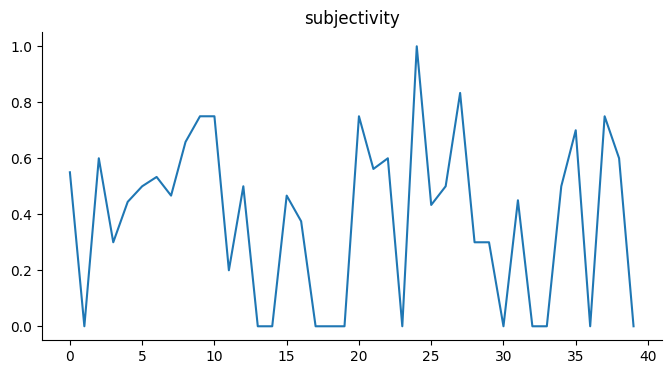

In [ ]:
# @title subjectivity

from matplotlib import pyplot as plt
df['subjectivity'].plot(kind='line', figsize=(8, 4), title='subjectivity')
plt.gca().spines[['top', 'right']].set_visible(False)

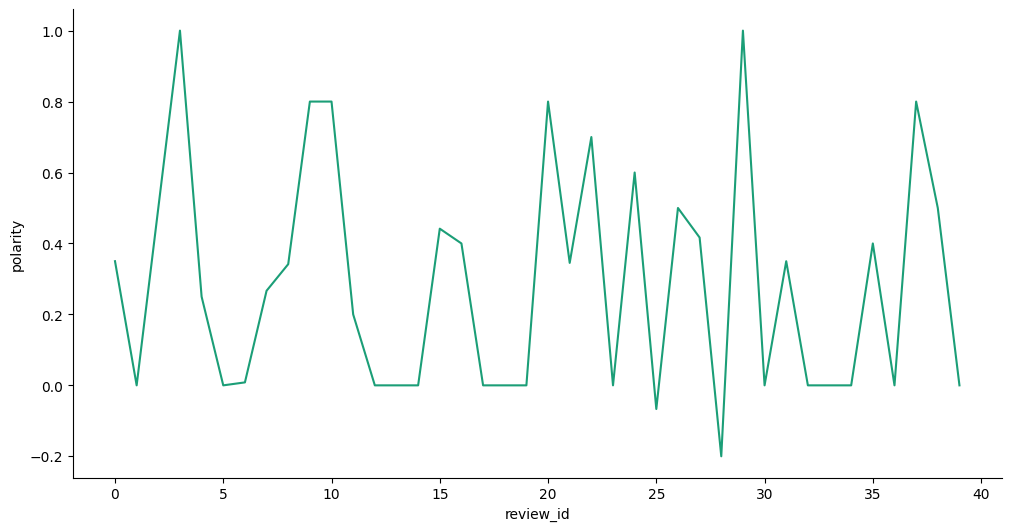

In [ ]:
# @title review_id vs polarity

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['review_id']
  ys = series['polarity']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('review_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('review_id')
_ = plt.ylabel('polarity')

In [ ]:
list_pieces = []
for t in df.review_text:
    split = split_text(t)
    list_pieces.append(split)


In [ ]:
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

In [ ]:
subjectivity_transcript = []
for lp in list_pieces:
    subjectivity_piece = []
    for p in lp:
        subjectivity_piece.append(TextBlob(p).sentiment.subjectivity)
    subjectivity_transcript.append(subjectivity_piece)


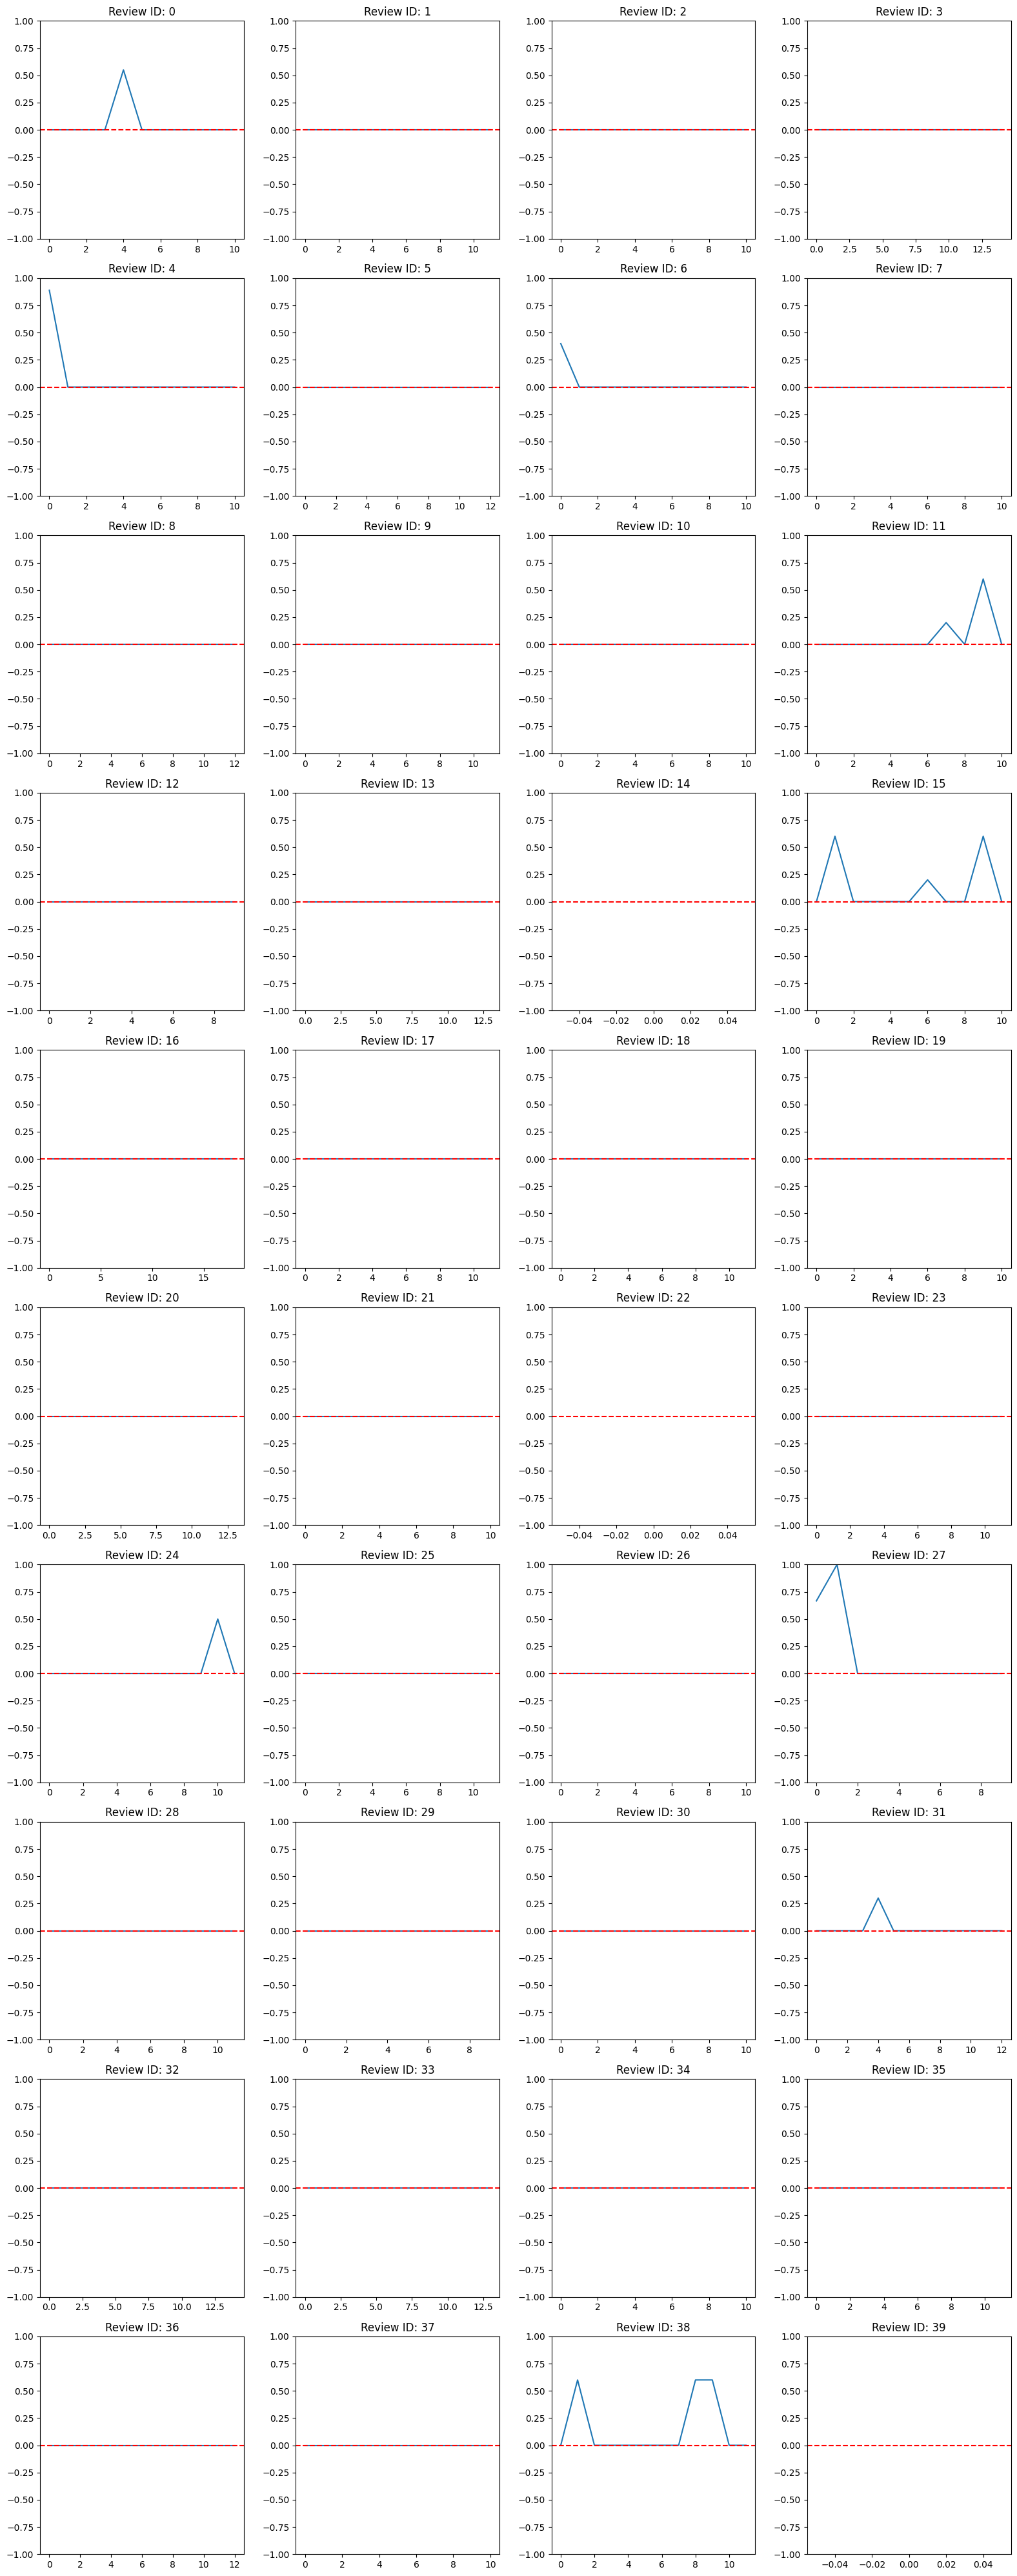

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate number of rows and columns needed for subplots
num_reviews = len(df)
num_rows = (num_reviews - 1) // 4 + 1
num_cols = min(num_reviews, 4)

# Set figure size
plt.rcParams['figure.figsize'] = [16, num_rows * 4]

# Plot subjectivity scores for all reviews
for index, review_id in enumerate(df['review_id']):
    plt.subplot(num_rows, num_cols, index + 1)  # Create subplot
    plt.plot(subjectivity_transcript[index])  # Plot subjectivity scores for the current review
    plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal dashed line at y=0
    plt.title(f"Review ID: {review_id}")  # Set title for the subplot
    plt.ylim(bottom=min(np.min(subjectivity_transcript[index]), -1), top=max(np.max(subjectivity_transcript[index]), 1))  # Set y-axis limits

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [ ]:
subavg,polavg=calpolsub(polarity_transcript,subjectivity_transcript)

In [ ]:
for i,review in enumerate(df.index):
    print(df['review_id'][i]," - ",classify_text(polavg[i],subavg[i]))

0  -  ('Positive', 'Objective')
1  -  ('Neutral', 'Objective')
2  -  ('Neutral', 'Objective')
3  -  ('Neutral', 'Objective')
4  -  ('Positive', 'Objective')
5  -  ('Neutral', 'Objective')
6  -  ('Negative', 'Objective')
7  -  ('Neutral', 'Objective')
8  -  ('Neutral', 'Objective')
9  -  ('Neutral', 'Objective')
10  -  ('Neutral', 'Objective')
11  -  ('Positive', 'Objective')
12  -  ('Neutral', 'Objective')
13  -  ('Neutral', 'Objective')
14  -  ('Neutral', 'Objective')
15  -  ('Positive', 'Objective')
16  -  ('Neutral', 'Objective')
17  -  ('Neutral', 'Objective')
18  -  ('Neutral', 'Objective')
19  -  ('Neutral', 'Objective')
20  -  ('Neutral', 'Objective')
21  -  ('Neutral', 'Objective')
22  -  ('Positive', 'Subjective')
23  -  ('Neutral', 'Objective')
24  -  ('Positive', 'Objective')
25  -  ('Neutral', 'Objective')
26  -  ('Neutral', 'Objective')
27  -  ('Positive', 'Objective')
28  -  ('Neutral', 'Objective')
29  -  ('Neutral', 'Objective')
30  -  ('Neutral', 'Objective')
31  -  ('

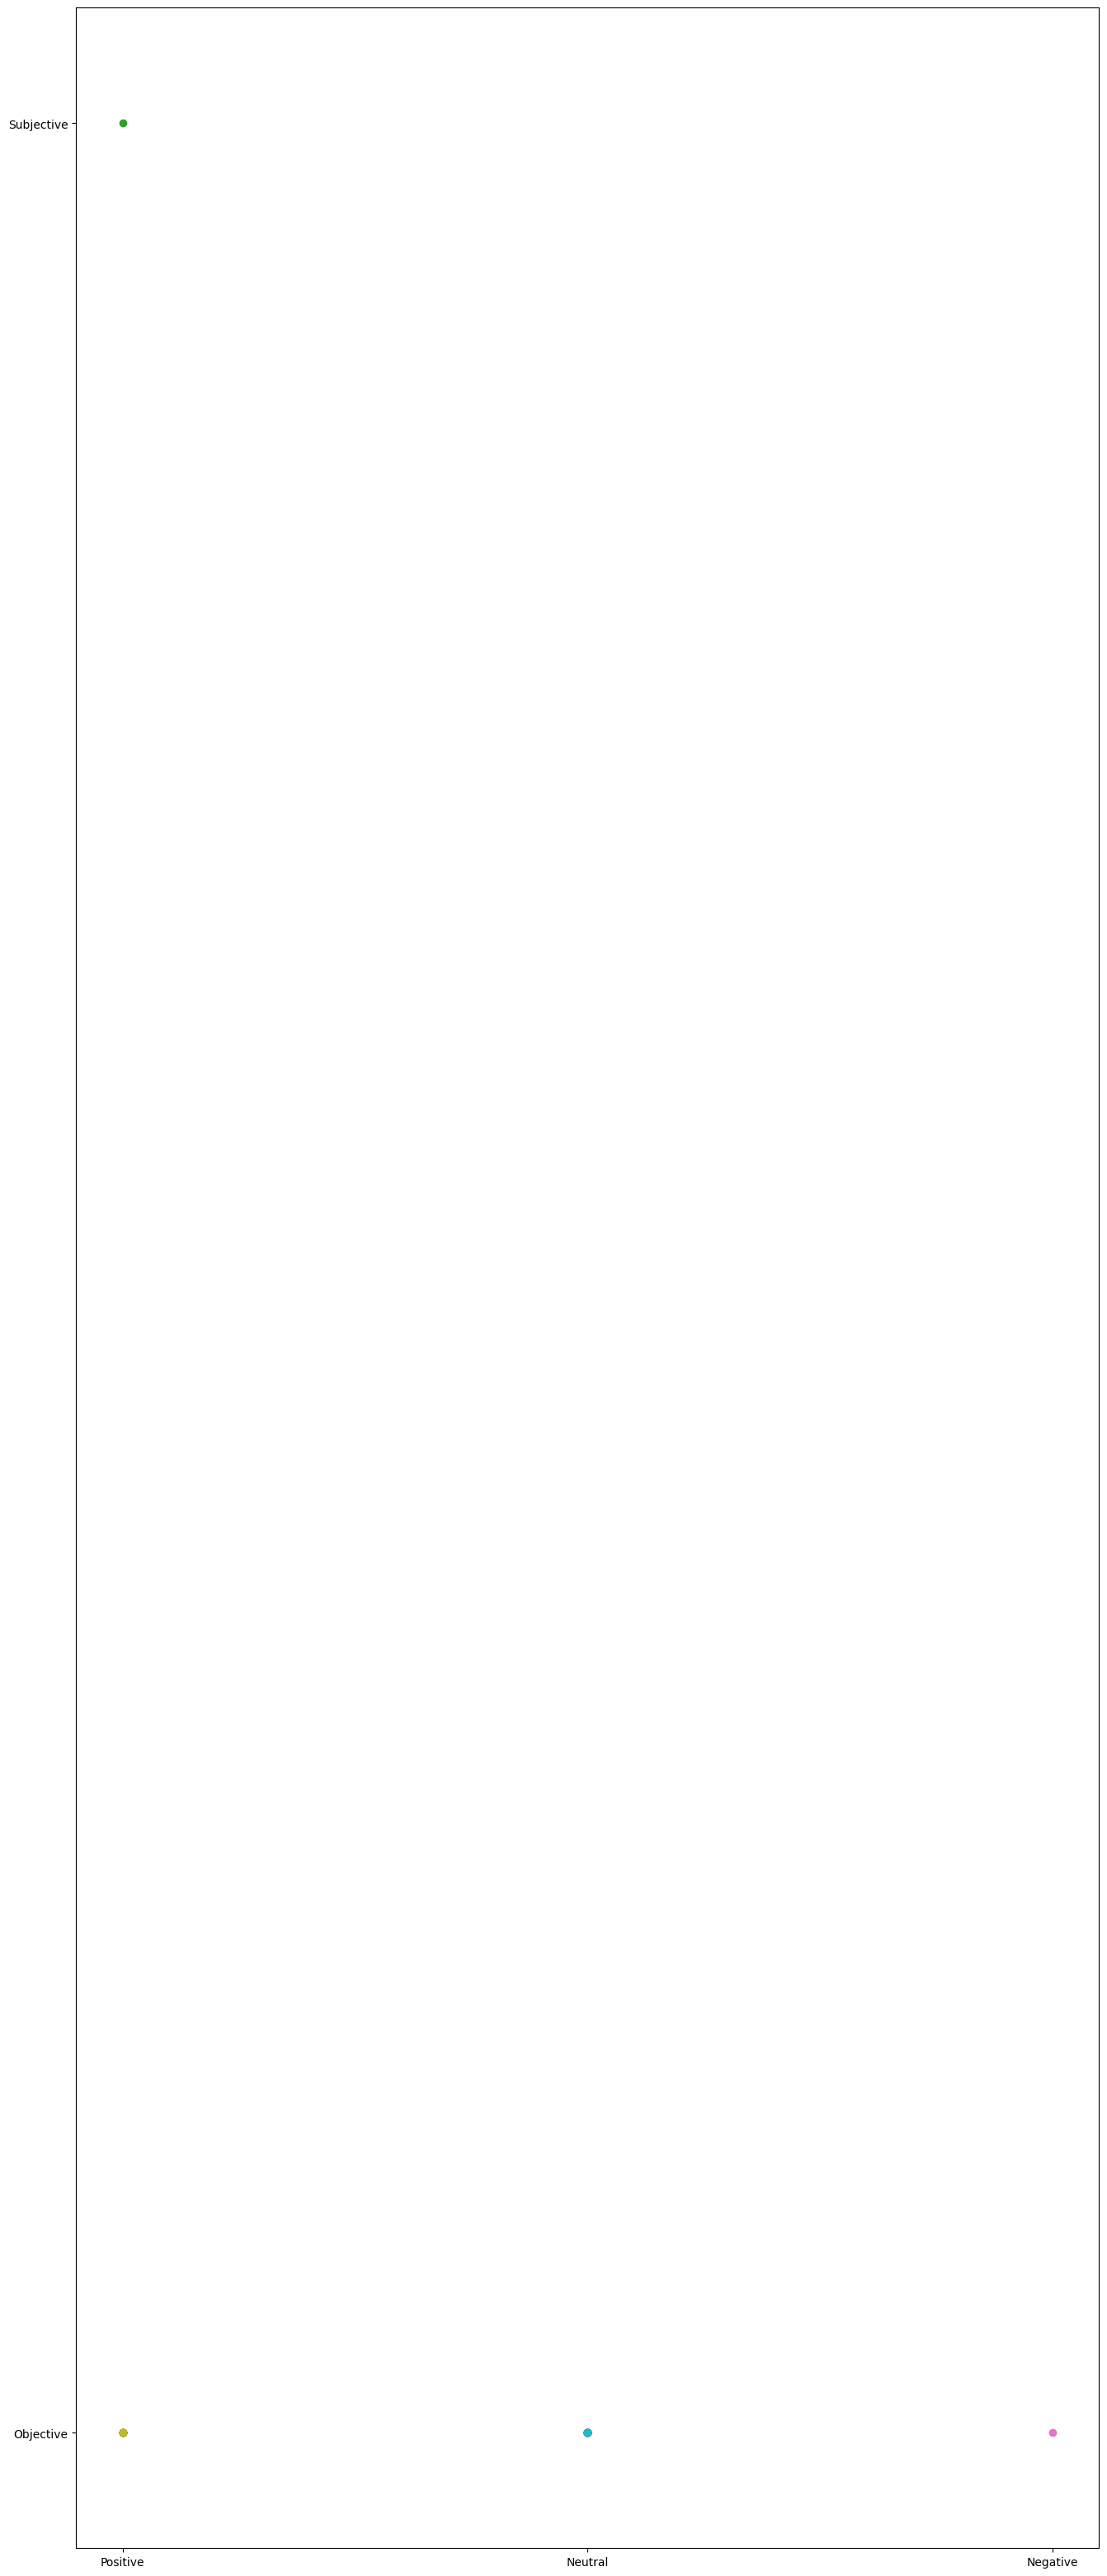

In [ ]:
for i,review in enumerate(df.index):
    pavg,savg=classify_text(polavg[i],subavg[i])
    plt.scatter(pavg,savg)
    #plt.text(pavg, savg, data['full_name'][i]+'\t', fontsize=10)
